In [8]:
import pandas as pd
%pylab inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
%cd /content/drive/My\Drive/p5
!ls

df = pd.read_csv(
    '/content/drive/MyDrive/p5/data_feature_eng.csv')

/content/drive/MyDrive/p5
data_feature_eng.csv		  olist_sellers_dataset.csv
olist_order_payments_dataset.csv  p5
olist_order_reviews_dataset.csv   POLIST_02_notebookessais.ipynb
olist_orders_dataset.csv	  product_category_name_translation.csv
olist_products_dataset.csv


In [11]:
pd.set_option('display.max_columns', None)
df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,zip_code_prefix_customer,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value,zip_code_prefix_seller,seller_city,seller_state,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,product_category_name,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,-17.851690,-41.493610,teofilo otoni,MG,af74cc53dcffc8384b29e7abfa41902b,57.0,921.0,8.0,800.0,17.0,27.0,17.0,1,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,13321,salto,SP,-23.190244,-47.291571,salto,SP,home_construction,2018,4,Apr,201804,20180425,25,2,Wed,22,Night
1,b545ba7b0bd67a3128185c7214704319,1,credit_card,8,340.08,7e2ca73af071679902a9ba14d7c3cee8,delivered,2018-06-11 14:59:24,2018-06-11 16:31:42,2018-06-12 14:15:00,2018-06-18 16:41:04,2018-07-04 00:00:00,5f65ad4b5147b940da2da6802f18bbf7,4,NaN,NaN,2018-06-19 00:00:00,2018-06-19 20:20:45,55020cb68ae358a51969695657a54e9c,15520,valentim gentil,SP,-20.421158,-50.086044,valentim gentil,SP,2233b59e8cf2817f9659e52cce3093de,58.0,1624.0,3.0,9350.0,20.0,20.0,20.0,1,e3d3b3efac954a60d61be70b7e05b49b,2018-06-15 15:20:20,316.05,24.03,3370,sao paulo,SP,-23.567995,-46.557625,sao paulo,SP,home_construction,2018,6,Jun,201806,20180611,11,0,Mon,14,Afternoon
2,6a26bd1a037993f1205073dbeda67db4,1,credit_card,2,67.12,2a44b3dbad360783fd663c15c3e6367c,delivered,2018-02-15 13:53:42,2018-02-15 14:10:28,2018-02-16 22:38:59,2018-03-02 22:29:04,2018-03-08 00:00:00,fad89f16742c04dcdfec38fd6c115561,4,NaN,"Otimo produto recebir no prazo certo,recomento",2018-03-03 00:00:00,2018-03-04 20:25:59,aca152a8bcfa7d7059b7787c67d60d52,13295,itupeva,SP,-23.159152,-47.058208,itupeva,SP,679a3e5e1d2bb68982be5734c6e55e63,57.0,565.0,4.0,800.0,38.0,38.0,22.0,1,8a130737016f838139d31878787a39c9,2018-02-21 13:10:28,54.40,12.72,3187,sao paulo,SP,-23.566231,-46.580203,sao paulo,SP,home_construction,2018,2,Feb,201802,20180215,15,3,Thu,13,Afternoon
3,1fce50c1831b6809773e5020edc716e2,1,credit_card,2,36.16,1ddcc619647ca008fdc24f8302c8573f,delivered,2018-07-24 20:08:54,2018-07-25 20:05:09,2018-07-26 16:04:00,2018-07-30 17:20:59,2018-08-07 00:00:00,bc0fa803dc47267d440652c24692784d,3,NaN,NaN,2018-07-31 00:00:00,2018-08-01 09:12:07,9aa679326b151fc564c2a238f361aa7d,5678,sao paulo,SP,-23.597505,-46.704756,sao paulo,SP,cce794ab6b84d0345332bb1910f9eb20,60.0,843.0,1.0,275.0,20.0,11.0,19.0,1,165b1235e9e9942cb5fae67103576fb0,2018-07-31 20:05:09,21.70,14.46,14020,ribeirao preto,SP,-21.210105,-47.801390,ribeirao preto,SP,home_construction,2018,7,Jul,201807,20180724,24,1,Tue,20,Night
4,107f069fdb62a9cbe252b043323e4e32,1,credit_card,2,175.13,ef0ce737cbf4c0d6aefb7c7281b658e3,delivered,2018-05-18 08:24:28,2018-05-18 08:55:36,2018-05-24 09:45:00,2018-06-12 18:18:45,2018-06-07 00:00:00,4d18eb591789b7687cf69ad6d6d4485c,5,Não recebi,Nã

In [12]:
features = ['order_id', 'order_status', 'order_purchase_timestamp',
       'payment_value', 'customer_unique_id', 'zip_code_prefix_customer','order_item_id',
       'customer_city', 'customer_state','order_purchase_date','order_delivered_customer_date','price','freight_value']
dff = df[features]
dff.shape

(116581, 13)

In [13]:
Olist_db= dff.copy()

In [14]:
Olist_db.isnull().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
payment_value                       0
customer_unique_id                  0
zip_code_prefix_customer            0
order_item_id                       0
customer_city                       0
customer_state                      0
order_purchase_date                 0
order_delivered_customer_date    2515
price                               0
freight_value                       0
dtype: int64

In [15]:
Olist_db.dropna(inplace=True)

In [16]:
Olist_db.describe()

,payment_value,zip_code_prefix_customer,order_item_id,order_purchase_date,price,freight_value
count,114066.000000,114066.000000,114066.000000,1.140660e+05,114066.000000,114066.000000
mean,172.135500,35081.680133,1.197500,2.017603e+07,120.008792,20.010184
std,266.139258,29849.608164,0.703142,4.870590e+03,182.426455,15.726425
min,0.000000,1003.000000,1.000000,2.016100e+07,0.850000,0.000000
25%,60.960000,11310.000000,1.000000,2.017091e+07,39.900000,13.080000
50%,108.065000,24320.000000,1.000000,2.018012e+07,74.900000,16.320000
75%,189.370000,58801.750000,1.000000,2.018050e+07,133.000000,21.190000
max,13664.080000,99980.000000,21.000000,2.018083e+07,6735.000000,409.680000


In [17]:
cond = Olist_db["order_status"] == "delivered"
Olist_db = Olist_db.loc[cond]

In [18]:
out= Olist_db[Olist_db['payment_value']>= 8000]
out

,order_id,order_status,order_purchase_timestamp,payment_value,customer_unique_id,zip_code_prefix_customer,order_item_id,customer_city,customer_state,order_purchase_date,order_delivered_customer_date,price,freight_value
111624,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,1,rio de janeiro,RJ,20170929,2017-10-17 18:22:29,1680.0,28.01
111625,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,2,rio de janeiro,RJ,20170929,2017-10-17 18:22:29,1680.0,28.01
111626,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,3,rio de janeiro,RJ,20170929,2017-10-17 18:22:29,1680.0,28.01
111627,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,4,rio de janeiro,RJ,20170929,2017-10-17 18:22:29,1680.0,28.01
111628,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,5,rio de janeiro,RJ,20170929,2017-10-17 18:22:29,1680.0,28.01
111629,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,6,rio de janeiro,RJ,20170929,2017-10-17 18:22:29,1680.0,28.01
111630,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,7,rio de janeiro,RJ,20170929,2017-10-17 18:22:29,1680.0,28.01
111631,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,8,rio de janeiro,RJ,20170929,2017-10-17 18:22:29,1680.0,28.01


In [19]:
Olist_db=Olist_db[Olist_db['payment_value']<= 8000]

## Feature Engineering

In [140]:
#the price of delivery that the customer pays
Olist_db['Delivery_price']=(Olist_db['freight_value']*Olist_db['order_item_id'])

#the price the customer pays for the number of products he ordered 
Olist_db['product_price']=(Olist_db['price']*Olist_db['order_item_id'])

#the price a customer pays when ordering
Olist_db['Total_puchase']=(Olist_db['product_price']+ Olist_db['Delivery_price'])

Text(0.5, 1.0, 'product_price')

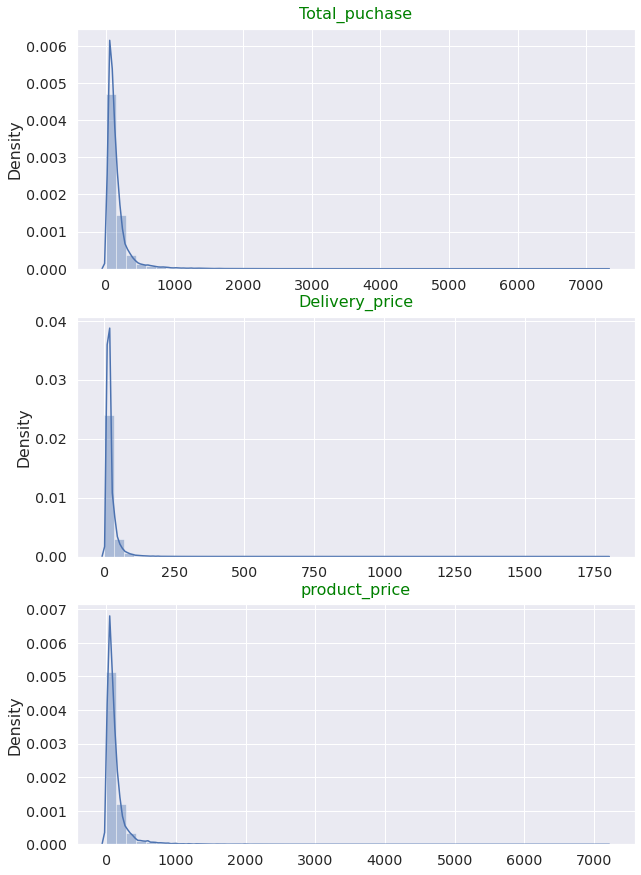

In [21]:
sns.set(font_scale=1.3)
plt.figure(figsize=(10,15))
# Plot of Total_puchase
plt.subplot(3, 1, 1)
sns.distplot(Olist_db['Total_puchase'])
plt.xlabel("")
plt.title('Total_puchase', size=16, color='green', pad=10)

# Plot of Delivery_price
plt.subplot(3, 1, 2)
sns.distplot(Olist_db['Delivery_price'])
plt.xlabel("")
plt.title('Delivery_price', size=16, color='green', pad=10)

# Plot of product_price
plt.subplot(3, 1, 3)
sns.distplot(Olist_db['product_price'])
plt.xlabel("")
plt.title('product_price', size=16, color='green', pad=10)

Text(0.5, 1.0, 'product_price')

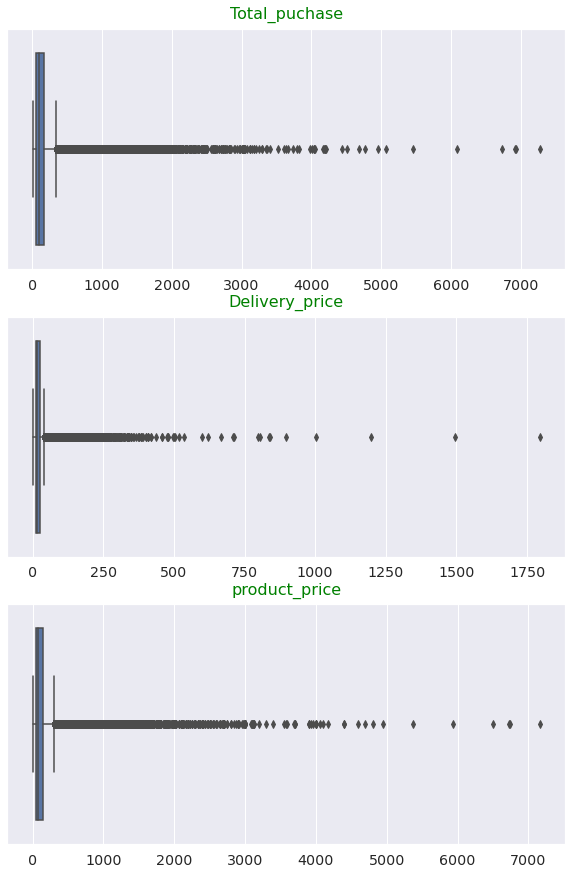

In [22]:
sns.set(font_scale=1.3)
plt.figure(figsize=(10,15))
# Plot of Total_puchase
plt.subplot(3, 1, 1)
sns.boxplot(Olist_db['Total_puchase'])
plt.xlabel("")
plt.title('Total_puchase', size=16, color='green', pad=10)

# Plot of Delivery_price
plt.subplot(3, 1, 2)
sns.boxplot(Olist_db['Delivery_price'])
plt.xlabel("")
plt.title('Delivery_price', size=16, color='green', pad=10)

# Plot of product_price
plt.subplot(3, 1, 3)
sns.boxplot(Olist_db['product_price'])
plt.xlabel("")
plt.title('product_price', size=16, color='green', pad=10)

### **RFM Modelling**

In [23]:
import datetime as dt

In [24]:
# Make the date_placed column datetime
Olist_db['order_purchase_timestamp'] = pd.to_datetime(Olist_db['order_purchase_timestamp'])

In [25]:
Olist_db['order_purchase_date'].max()

20180829

In [26]:
NOW = dt.datetime(2018,8,30)

rfmTable = Olist_db.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x: ((NOW - x.max()).days) , # Recency
                                        'order_id': lambda x: len(x),      # Frequency
                                        'Total_puchase': lambda x: x.sum()}).reset_index() # Monetary Value

rfmTable['order_purchase_timestamp'] = rfmTable['order_purchase_timestamp'].astype(int)
rfmTable.rename(columns={'order_purchase_timestamp': 'Recency', 
                         'order_id': 'Frequency', 
                         'Total_puchase': 'Monetary'}, inplace=True)

In [47]:
rfmTable.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [48]:
rfmTable.Recency.describe()

count    92069.000000
mean       236.800411
std        152.581075
min          0.000000
25%        113.000000
50%        218.000000
75%        345.000000
max        695.000000
Name: Recency, dtype: float64

Text(0.5, 1.0, 'Recency')

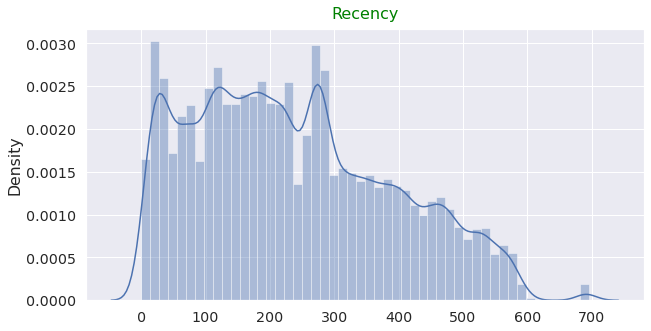

In [49]:
sns.set(font_scale=1.3)
plt.figure(figsize=(10,5))
# Plot distribution of Recency)
sns.distplot(rfmTable['Recency'])
plt.xlabel("")
plt.title('Recency', size=16, color='green', pad=10)

In [50]:
rfmTable.Frequency.describe()

count    92069.000000
mean         1.238756
std          0.847393
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         75.000000
Name: Frequency, dtype: float64

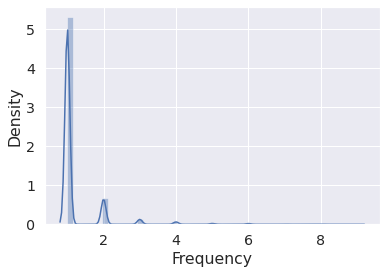

In [51]:
# Plot distribution of Frequency
import seaborn as sns
x = rfmTable.query('Frequency < 10')['Frequency']

ax = sns.distplot(x)

In [52]:
rfmTable.Monetary.describe()

count    92069.000000
mean       197.035586
std        381.635483
min         10.070000
25%         64.510000
50%        113.860000
75%        201.080000
max      23759.400000
Name: Monetary, dtype: float64

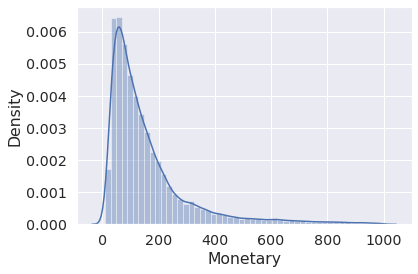

In [53]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfmTable.query('Monetary < 1000')['Monetary']

ax = sns.distplot(x)


In [54]:
out= rfmTable[rfmTable['Monetary']>= 20000]
out

,customer_unique_id,Recency,Frequency,Monetary
23092,4007669dec559734d6f53e029e360987,278,6,21285.39
38050,698e1cf81d01a3d389d96145f7fa6df8,371,20,23759.40
70600,c402f431464c72e27330a67f7b94d4fb,188,20,23125.20


In [55]:
rfmTable=rfmTable[rfmTable['Monetary']<= 25000]

### **Determining RFM Quartiles**

In [27]:
#Split into four segments using quantiles
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])

In [28]:
quantiles

,Recency,Frequency,Monetary
0.25,113.0,1.0,64.51
0.50,218.0,1.0,113.86
0.75,345.0,1.0,201.08


Creating the RFM segmentation table

In [29]:
rfmSegmentation = rfmTable

In [30]:
# Arguments (x = value, p = recency, monetary, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [31]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['Recency'].apply(RClass, args=('Recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [32]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) + rfmSegmentation.F_Quartile.map(str) + rfmSegmentation.M_Quartile.map(str)

#Calculate and Add RFM_Score value column showing total sum of RFMClass values
rfmSegmentation['RFMScore'] = rfmSegmentation[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis = 1)
rfmSegmentation.head()

,customer_unique_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,2,142,7
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,4,4,244,10
2,0000f46a3911fa3c0805444483337064,537,1,86.22,4,4,3,443,11
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,4,4,344,11
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,3,4,2,342,9


to select groups of customers to whom specific types of communications will be sent, based on the RFM segments in which they appear.



 *  **Best Customers** - It’s important to make them feel valued and appreciated – and to give them terrific incentives to continue interacting with the brand.

 *  **Churned Best Customers** — Showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let's target them with their wishlist items and a limited time offer discount.

*   **Lost Customers** — Made some initial purchases but have not seen them since. Was it a bad customer experience? Or product-market fit?

*  **Loyal Customers** — These are the most loyal customers. They are active with frequent purchases and high monetary value. They could be the brand evangelists and should focus on serving them well. They could be the best customers to get feedback on any new product launches or be the early adopters or promoters.



In [157]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Best Customers', 'Churned Best Customers' ,'Loyal Customers', 'Lost customers']
Score_cuts = pd.qcut(rfmSegmentation.RFMScore, q = 4, labels = Loyalty_Level)
rfmSegmentation['RFM_Loyalty_Level'] = Score_cuts.values
rfmSegmentation.reset_index().head()

,index,customer_unique_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore,RFM_Loyalty_Level,Cluster
0,0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,2,142,7,Best Customers,0
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,4,4,244,10,Loyal Customers,2
2,2,0000f46a3911fa3c0805444483337064,537,1,86.22,4,4,3,443,11,Lost customers,2
3,3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,4,4,344,11,Lost customers,2
4,4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,3,4,2,342,9,Churned Best Customers,0


In [158]:
#Validate the data for RFMGroup = 111
rfmSegmentation[rfmSegmentation['RFMClass']=='111'].sort_values('Monetary', ascending=False).reset_index().tail()

,index,customer_unique_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore,RFM_Loyalty_Level,Cluster
2246,29558,5206a6a64eeb54d092be68b3427f3d92,88,3,201.48,1,1,1,111,3,Best Customers,1
2247,28301,4e7da8460a307b63a7a4d98750f3a95a,86,2,201.48,1,1,1,111,3,Best Customers,1
2248,15705,2b9232e6420338fd502e6fe6a7cd05e4,90,2,201.48,1,1,1,111,3,Best Customers,1
2249,5278,0ea2230b68a32e47af9b398fe42a6a0e,29,2,201.45,1,1,1,111,3,Best Customers,1
2250,33802,5d9a935069dbcca38415cb23b8cc4ef4,7,2,201.42,1,1,1,111,3,Best Customers,3


In [35]:
rfmSegmentation.shape

(92069, 10)

In [36]:
rfmSegmentation['RFM_Loyalty_Level'].value_counts()

Churned Best Customers    33601
Best Customers            25585
Lost customers            16814
Loyal Customers           16069
Name: RFM_Loyalty_Level, dtype: int64

### Group Customer by their Customer Segment

In [37]:
#Calculate Average values for each customer segment and return size of each segment
rfm_level_agg = rfmSegmentation.groupby(['RFM_Loyalty_Level']).agg({'Recency': 'mean',
                                                                   'Frequency' : 'mean',
                                                                   'Monetary': ['mean', 'count']}).round(1)
#print the aggregated dataset
rfm_level_agg

Recency Frequency Monetary       
                          mean      mean     mean  count
RFM_Loyalty_Level                                       
Best Customers           162.2       1.8    393.4  25585
Churned Best Customers   191.6       1.0    168.3  33601
Loyal Customers          288.4       1.0     89.8  16069
Lost customers           391.4       1.0     58.1  16814

In [38]:
!pip install squarify

(0.0, 100.0, 0.0, 100.0)

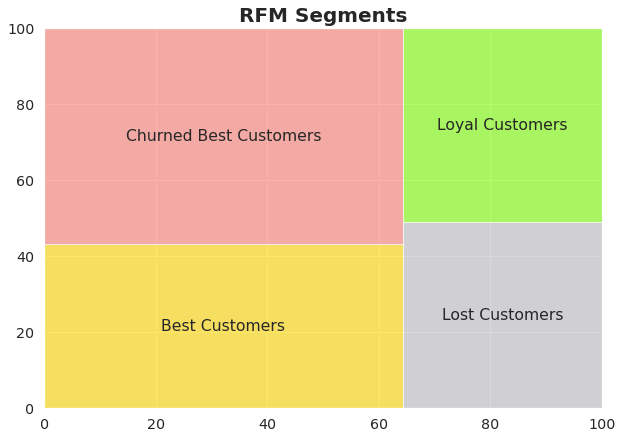

In [68]:
import squarify
sns.set(font_scale=1.3)
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10, 7)
color = ['gold', 'salmon', 'silver', 'lawngreen']
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Best Customers',
                     'Churned Best Customers',
                     'Lost Customers',
                     'Loyal Customers'], alpha=.6,color=color)
plt.title("RFM Segments",fontsize=20,fontweight="bold")
plt.axis('on')

Text(0.5, 0, 'Count')

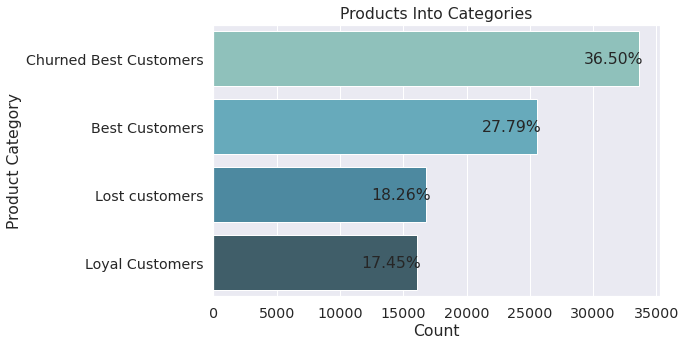

In [39]:
fig = plt.figure(figsize=(8, 5))
ax = sns.countplot(y=rfmSegmentation['RFM_Loyalty_Level'],palette="GnBu_d",
                   order = rfmSegmentation['RFM_Loyalty_Level'].value_counts().index[:20])
total = len(rfmSegmentation['RFM_Loyalty_Level'])
for p in ax.patches:
    x = (p.get_width()-2000)
    y = (p.get_y() + p.get_height()/2) + 0.15
    ax.annotate('{:.2f}%'.format(100 * p.get_width()/total), (x,y),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Products Into Categories')
plt.ylabel('Product Category')
plt.xlabel('Count')

### **Clustering with KMean algorithm**

**Normalization**

In [40]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfmSegmentation['Recency'] = [handle_neg_n_zero(x) for x in rfmSegmentation.Recency]
rfmSegmentation['Monetary'] = [handle_neg_n_zero(x) for x in rfmSegmentation.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfmSegmentation[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

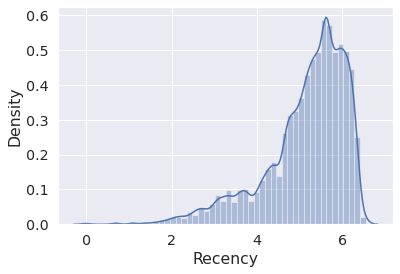

In [71]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

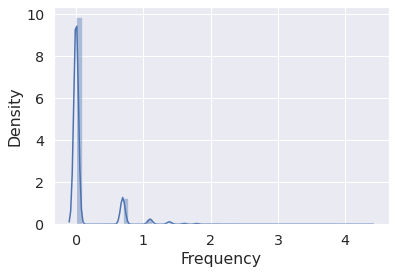

In [72]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 10')['Frequency']
ax = sns.distplot(Frequency_Plot)

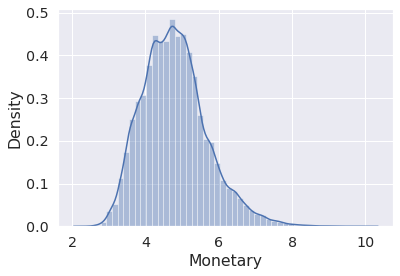

In [73]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 1000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [41]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = rfmSegmentation.index, columns = Log_Tfd_Data.columns)

In [42]:
Scaled_Data

,Recency,Frequency,Monetary
0,-0.453208,-0.387553,0.181149
1,-0.426159,-0.387553,-1.685662
2,1.186351,-0.387553,-0.381606
3,0.650582,-0.387553,-1.151157
4,0.538226,-0.387553,0.551799
...,...,...,...
92064,0.995971,1.661174,3.624354
92065,0.439395,-0.387553,-0.403077
92066,1.244610,-0.387553,-0.081018
92067,-0.381425,-0.387553,0.114477


### **K-Means Clustering**

In [43]:
from sklearn.cluster import KMeans
#from sklearn import metrics, cluster
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.datasets import make_blobs

Text(0.5, 1.0, 'Elbow Method For Optimal k')

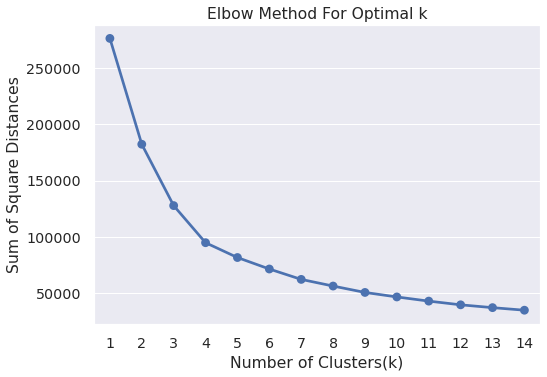

In [77]:
sns.set(font_scale=1.3)

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')

### **Evaluation clustering algorithms**

**1.K-Elbow Plot**

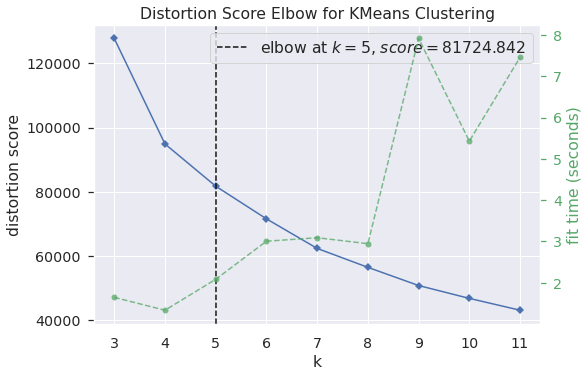

In [78]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))

visualizer.fit(Scaled_Data)   
visualizer.poof()

**2.Calinski harabasz plot**

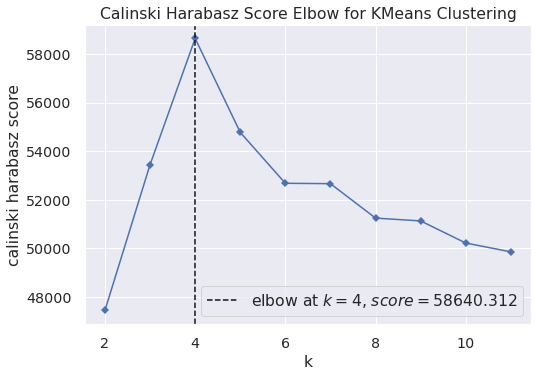

In [160]:
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', timings=False)

visualizer.fit(Scaled_Data)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

**3.Silhouette Visualizer**

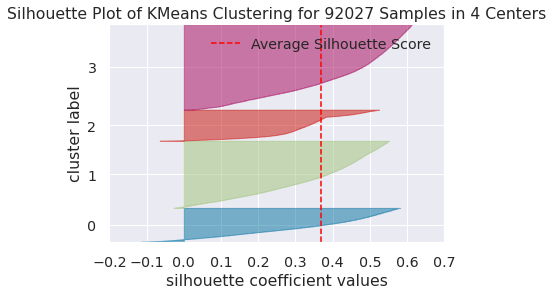

In [ ]:
model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(Scaled_Data)   
visualizer.poof()

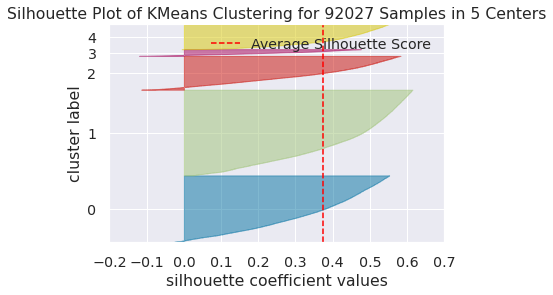

In [ ]:
model = KMeans(5)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(Scaled_Data)   
visualizer.poof()

## TSNE

TSNE is a usefull technique for visualisating high-dimensionality data. The t-SNE algorithm is interesting because it uses joint probability distributions to describe the closeness of data points.

In [84]:
from sklearn.manifold import TSNE

In [85]:
tsne_model =TSNE()


In [86]:
X_tsne= tsne_model.fit_transform(Scaled_Data)

KeyboardInterrupt: ignored

In [112]:
my_clust5 = KMeans(n_clusters=5, random_state=1)
my_clust5.fit(Scaled_Data)
dataModel5 = rfmSegmentation.assign(Cluster=my_clust5.labels_)

Text(0.5, 1.0, 'Clusters with TSNE projection')

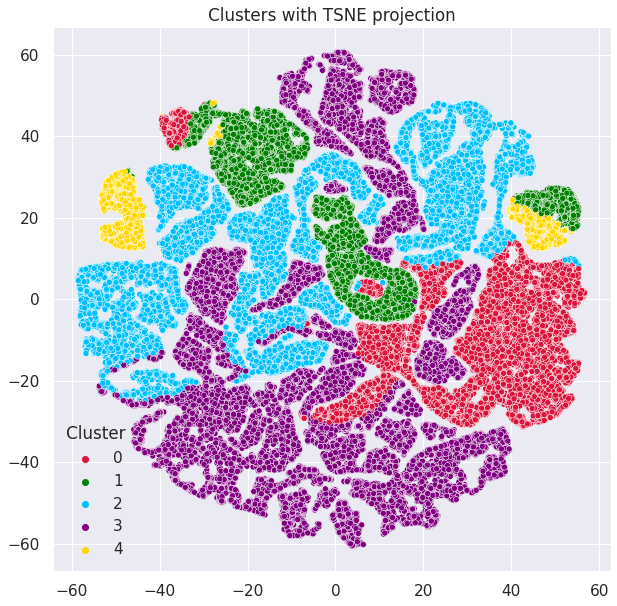

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize=(8,8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1],hue='Cluster',data=dataModel5,\
                palette=['crimson','green','deepskyblue','purple','gold'])
plt.title('Clusters with TSNE projection')

In [111]:
my_clust = KMeans(n_clusters=4, random_state=1)
my_clust.fit(Scaled_Data)
dataModel4 = rfmSegmentation.assign(Cluster=my_clust.labels_)

Text(0.5, 1.0, 'Clusters with TSNE projection')

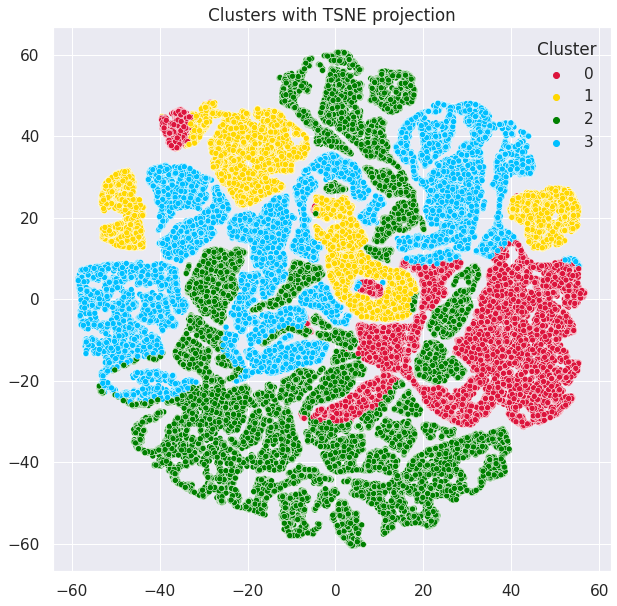

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize=(8,8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1],hue='Cluster',data=dataModel4,\
                palette=['crimson','gold','green','deepskyblue'])
plt.title('Clusters with TSNE projection')

In [44]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
rfmSegmentation['Cluster'] = KMean_clust.labels_
rfmSegmentation.head(10)

,customer_unique_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore,RFM_Loyalty_Level,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,2,142,7,Best Customers,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,4,4,244,10,Loyal Customers,2
2,0000f46a3911fa3c0805444483337064,537,1,86.22,4,4,3,443,11,Lost customers,2
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,4,4,344,11,Lost customers,2
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,3,4,2,342,9,Churned Best Customers,0
5,0004bd2a26a76fe21f786e4fbd80607f,146,1,166.98,2,4,2,242,8,Churned Best Customers,0
6,00050ab1314c0e55a6ca13cf7181fecf,131,1,35.38,2,4,4,244,10,Loyal Customers,2
7,00053a61a98854899e70ed204dd4bafe,182,2,628.77,2,1,1,211,4,Best Customers,1
8,0005e1862207bf6ccc02e4228effd9a0,543,1,150.12,4,4,2,442,10,Loyal Customers,0
9,0005ef4cd20d2893f0d9fbd94d3c0d97,170,1,129.76,2,4,2,242,8,Churned Best Customers,0


In [49]:
c=rfmSegmentation[rfmSegmentation['Cluster']== 0]
c

,customer_unique_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore,RFM_Loyalty_Level,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,2,142,7,Best Customers,0
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,3,4,2,342,9,Churned Best Customers,0
5,0004bd2a26a76fe21f786e4fbd80607f,146,1,166.98,2,4,2,242,8,Churned Best Customers,0
8,0005e1862207bf6ccc02e4228effd9a0,543,1,150.12,4,4,2,442,10,Loyal Customers,0
9,0005ef4cd20d2893f0d9fbd94d3c0d97,170,1,129.76,2,4,2,242,8,Churned Best Customers,0
...,...,...,...,...,...,...,...,...,...,...,...
92044,ffec10ad4229ba46818560e1c8b40a68,146,1,135.72,2,4,2,242,8,Churned Best Customers,0
92051,ffef0ffa736c7b3d9af741611089729b,457,1,139.07,4,4,2,442,10,Loyal Customers,0
92053,fff1bdd5c5e37ca79dd74deeb91aa5b6,186,1,172.98,2,4,2,242,8,Churned Best Customers,0
92055,fff2ae16b99c6f3c785f0e052f2a9cfb,131,1,200.90,2,4,2,242,8,Churned Best Customers,0


<Figure size 504x504 with 0 Axes>

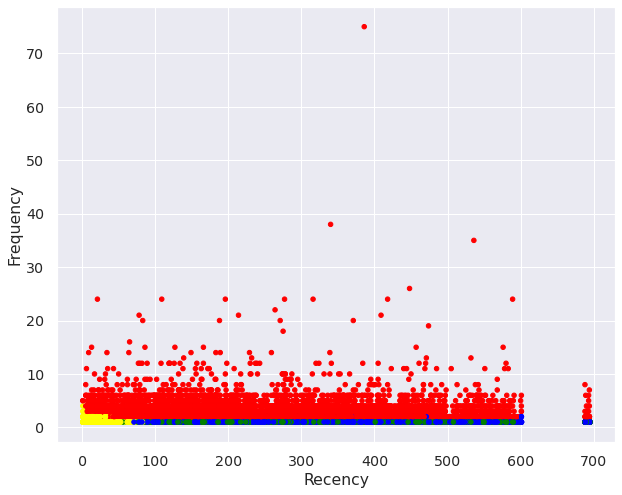

In [88]:
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue",'yellow']
rfmSegmentation['Color'] = rfmSegmentation['Cluster'].map(lambda p: Colors[p])
ax = rfmSegmentation.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = rfmSegmentation['Color']
)

In [86]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

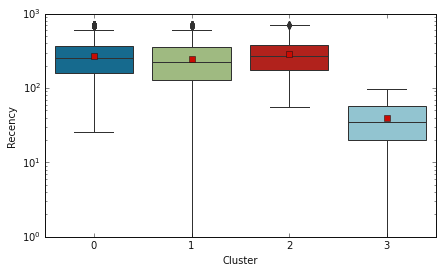

In [103]:
fig, axes = plt.subplots(  figsize=(7,4))

sns.boxplot(y='Recency', x='Cluster', data=rfmSegmentation, showmeans=True)
plt.yscale('log')

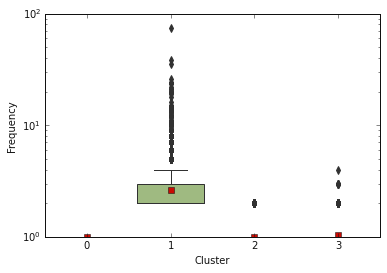

In [104]:

sns.boxplot(y='Frequency', x='Cluster', data=rfmSegmentation, showmeans=True)
plt.yscale('log')



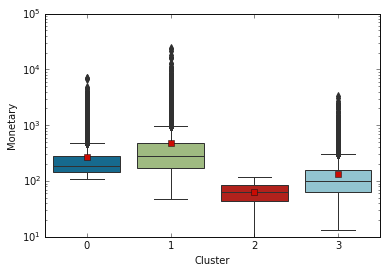

In [105]:
sns.boxplot(y='Monetary', x='Cluster', data=rfmSegmentation,showmeans=True )
plt.yscale('log')

* cluster 0: churned best customers
* cluster 1: best customers
* cluster 2: lost customers
* cluster 3: loyal customers

Text(0.5, 0, 'Count')

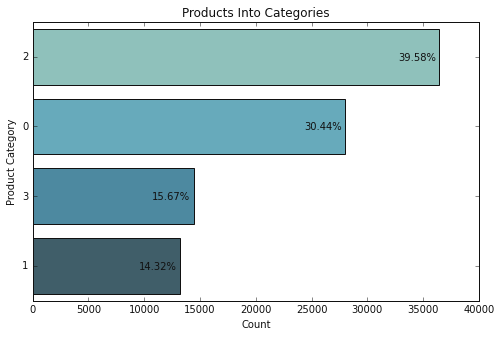

In [106]:
fig = plt.figure(figsize=(8, 5))
ax = sns.countplot(y=rfmSegmentation['Cluster'],palette="GnBu_d",
                   order = rfmSegmentation['Cluster'].value_counts().index[:20])
total = len(rfmSegmentation['Cluster'])
for p in ax.patches:
    x = (p.get_width()-2000)
    y = (p.get_y() + p.get_height()/2) + 0.15
    ax.annotate('{:.2f}%'.format(100 * p.get_width()/total), (x,y),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Products Into Categories')
plt.ylabel('Product Category')
plt.xlabel('Count')

## **DBSCAN**

In [113]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [114]:
db = DBSCAN(eps=0.3).fit(Scaled_Data)

In [115]:
labels = db.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

In [116]:
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 16
Estimated no. of noise points: 466


**Adjusted Rand Score** (ARS)

Adjusted Rand Score, computes a similarity measure between two clusters. ARS considers all pairs of samples and counts pairs that are assigned in the same or different clusters in the predicted and true clusters. 0 is the lowest similarity and 1 is the highest.

In [122]:
from sklearn import metrics
df = pd.DataFrame()
my_clust4 = KMeans(n_clusters=4, random_state=1)
my_clust4.fit(Scaled_Data)

for i in range(200):
    test = KMeans(n_clusters=4)
    test.fit_predict(Scaled_Data)
    ari = metrics.adjusted_rand_score(my_clust4.labels_, test.labels_)
    test = pd.DataFrame(test.cluster_centers_)
    test.columns = ['RecencyCor', 'FrequenceCor', 'MonetaryCor']
    test['Indice'] = i
    test['ARI'] = ari
    # Calcul du rand score qui doit etre proche de 1
    # car ils sont choisis aleatoirement
    df = pd.concat([df, test])

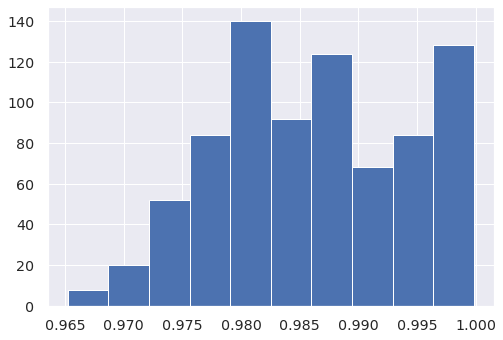

In [123]:
df['ARI'].hist()   

In [ ]:
Olist_db.head()

,order_id,order_status,order_purchase_timestamp,payment_value,customer_unique_id,zip_code_prefix_customer,order_item_id,customer_city,customer_state,order_purchase_date,order_delivered_customer_date,price,freight_value,Total_puchase,Delivery_price,product_price
0,b81ef226f3fe1789b1e8b2acac839d17,delivered,2018-04-25 22:01:49,99.33,708ab75d2a007f0564aedd11139c7708,39801,1,teofilo otoni,MG,20180425,2018-05-09 17:36:51,79.80,19.53,99.33,19.53,79.80
1,b545ba7b0bd67a3128185c7214704319,delivered,2018-06-11 14:59:24,340.08,55020cb68ae358a51969695657a54e9c,15520,1,valentim gentil,SP,20180611,2018-06-18 16:41:04,316.05,24.03,340.08,24.03,316.05
2,6a26bd1a037993f1205073dbeda67db4,delivered,2018-02-15 13:53:42,67.12,aca152a8bcfa7d7059b7787c67d60d52,13295,1,itupeva,SP,20180215,2018-03-02 22:29:04,54.40,12.72,67.12,12.72,54.40
3,1fce50c1831b6809773e5020edc716e2,delivered,2018-07-24 20:08:54,36.16,9aa679326b151fc564c2a238f361aa7d,5678,1,sao paulo,SP,20180724,2018-07-30 17:20:59,21.70,14.46,36.16,14.46,21.70
4,107f069fdb62a9cbe252b043323e4e32,delivered,2018-05-18 08:24:28,175.13,2acd1014f0a4e286b0896f30b67c1e80,79010,1,campo grande,MS,20180518,2018-06-12 18:18:45,156.45,18.68,175.13,18.68,156.45


In [117]:
dataEtude=Olist_db.copy()

In [118]:
dataEtude['order_purchase_timestamp']=pd.to_datetime(dataEtude['order_purchase_timestamp'])

In [119]:
dataEtude['year']=dataEtude['order_purchase_timestamp'].dt.year

In [120]:
dataEtude['Date']=dataEtude['order_purchase_timestamp'].dt.strftime( "%Y-%m-%d")

In [121]:
dataEtude['Date']=pd.to_datetime(dataEtude['Date'])

In [122]:
dataEtude['Month_year']=dataEtude['order_purchase_timestamp'].dt.strftime( "%B-%Y")


In [70]:
data=pd.merge(dataEtude,rfmSegmentation,on='customer_unique_id')

In [124]:
dataEtude.head()

,order_id,order_status,order_purchase_timestamp,payment_value,customer_unique_id,zip_code_prefix_customer,order_item_id,customer_city,customer_state,order_purchase_date,order_delivered_customer_date,price,freight_value,Total_puchase,Delivery_price,product_price,year,Date,Month_year
0,b81ef226f3fe1789b1e8b2acac839d17,delivered,2018-04-25 22:01:49,99.33,708ab75d2a007f0564aedd11139c7708,39801,1,teofilo otoni,MG,20180425,2018-05-09 17:36:51,79.80,19.53,99.33,19.53,79.80,2018,2018-04-25,April-2018
1,b545ba7b0bd67a3128185c7214704319,delivered,2018-06-11 14:59:24,340.08,55020cb68ae358a51969695657a54e9c,15520,1,valentim gentil,SP,20180611,2018-06-18 16:41:04,316.05,24.03,340.08,24.03,316.05,2018,2018-06-11,June-2018
2,6a26bd1a037993f1205073dbeda67db4,delivered,2018-02-15 13:53:42,67.12,aca152a8bcfa7d7059b7787c67d60d52,13295,1,itupeva,SP,20180215,2018-03-02 22:29:04,54.40,12.72,67.12,12.72,54.40,2018,2018-02-15,February-2018
3,1fce50c1831b6809773e5020edc716e2,delivered,2018-07-24 20:08:54,36.16,9aa679326b151fc564c2a238f361aa7d,5678,1,sao paulo,SP,20180724,2018-07-30 17:20:59,21.70,14.46,36.16,14.46,21.70,2018,2018-07-24,July-2018
4,107f069fdb62a9cbe252b043323e4e32,delivered,2018-05-18 08:24:28,175.13,2acd1014f0a4e286b0896f30b67c1e80,79010,1,campo grande,MS,20180518,2018-06-12 18:18:45,156.45,18.68,175.13,18.68,156.45,2018,2018-05-18,May-2018


## Application of the model over time

In [128]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import metrics

In [ ]:
dataEtude.tail()

,order_id,order_status,order_purchase_timestamp,payment_value,customer_unique_id,zip_code_prefix_customer,order_item_id,customer_city,customer_state,order_purchase_date,order_delivered_customer_date,price,freight_value,Total_puchase,Delivery_price,product_price,year,Date,Month_year
116575,bc3ac768a8963f4ca68942ea6558fc9f,delivered,2018-03-21 09:40:36,106.43,cd52ca09554e5cc34d9ec28d230008af,89074,1,blumenau,SC,20180321,2018-03-27 20:14:40,39.99,6.43,46.42,6.43,39.99,2018,2018-03-21,March-2018
116576,b99217b1fcf2fdeace7b8d869b76cb91,delivered,2018-03-07 17:42:06,110.44,a1d53377ab83871b0ad483b03ac69d6c,3570,1,sao paulo,SP,20180307,2018-03-15 22:04:49,39.99,10.15,50.14,10.15,39.99,2018,2018-03-07,March-2018
116577,3da4b0f0c89bb8fee8a810459e641414,delivered,2017-06-08 16:46:33,118.96,1f83c87997168e248ea52ad3453b069f,4128,1,sao paulo,SP,20170608,2017-06-13 13:23:01,110.00,8.96,118.96,8.96,110.00,2017,2017-06-08,June-2017
116579,cab08f0417a702d0f4782ec02356a4ac,delivered,2017-09-30 18:54:53,107.06,27558f96bc671d0594c60be61566aeb4,46500,1,macaubas,BA,20170930,2017-10-30 12:37:42,89.99,17.07,107.06,17.07,89.99,2017,2017-09-30,September-2017
116580,ee86b68eb9222b0cad7da50f4f758a35,delivered,2017-05-17 17:44:34,124.52,1b553902a5bbe6ee54a3aaa7cbfb6816,26255,1,nova iguacu,RJ,20170517,2017-05-20 08:44:01,110.00,14.52,124.52,14.52,110.00,2017,2017-05-17,May-2017


In [ ]:
data['Total_puchase']

0          99.33
1         340.08
2          67.12
3          36.16
4         175.13
           ...  
114046     54.09
114047     97.48
114048    118.96
114049    107.06
114050    124.52
Name: Total_puchase, Length: 114051, dtype: float64

In [126]:
i = (dataEtude['Month_year'] == 'June-2017') ^ (dataEtude['Month_year'] == 'July-2017')
jun_jul17 = dataEtude[i]
features = ['Total_puchase']
index = jun_jul17.columns.isin(features)
dataModel_jun_jul17 = jun_jul17[jun_jul17.columns[index]]

In [129]:

# Standarisation
x_jun_jul17 = dataModel_jun_jul17.values
X_scaled_jun_jul17 = StandardScaler().fit_transform(x_jun_jul17)
# modele
model_jun_jul17 = KMeans(n_clusters=4)
model_jun_jul17.fit(X_scaled_jun_jul17)
# pred
pred_jun_jul17 = KMeans(n_clusters=4)
pred_jun_jul17.fit_predict(X_scaled_jun_jul17)
ARS_jun_jul17 = adjusted_rand_score(model_jun_jul17.labels_, pred_jun_jul17.labels_)

In [130]:
i = (dataEtude['Month_year'] == 'September-2017') ^ (dataEtude['Month_year'] == 'August-2017')
    
aug17_sep17 = dataEtude[i]
jun_sep17 = pd.merge(jun_jul17, aug17_sep17, how='outer')
features = ['Total_puchase']
index = jun_sep17.columns.isin(features)
dataModel_jun_sep17 = jun_sep17[jun_sep17.columns[index]]
# Standarisation
x_jun_sep17= dataModel_jun_sep17.values
X_scaled_jun_sep17 = StandardScaler().fit_transform(x_jun_sep17)
# modele
model_jun_sep17 = KMeans(n_clusters=4)
model_jun_sep17.fit(X_scaled_jun_sep17)
# pred
pred_jun_sep17 = KMeans(n_clusters=4)
pred_jun_sep17.fit_predict(X_scaled_jun_sep17)
ARS_jun_sep17 = adjusted_rand_score(model_jun_sep17.labels_, pred_jun_sep17.labels_)

In [131]:
i = (dataEtude['Month_year'] == 'October-2017') ^ (dataEtude['Month_year'] == 'November-2017')
    
oct17_nov17 = dataEtude[i]
jun_nov17 = pd.merge(jun_jul17, oct17_nov17, how='outer')
features = ['Total_puchase']
index = jun_nov17.columns.isin(features)
dataModel_jun_nov17 = jun_nov17[jun_nov17.columns[index]]
# Standarisation
x_jun_nov17= dataModel_jun_nov17.values
X_scaled_jun_nov17 = StandardScaler().fit_transform(x_jun_nov17)
# modele
model_jun_nov17 = KMeans(n_clusters=4)
model_jun_nov17.fit(X_scaled_jun_nov17)
# pred
pred_jun_nov17 = KMeans(n_clusters=4)
pred_jun_nov17.fit_predict(X_scaled_jun_nov17)
ARS_jun_nov17 = adjusted_rand_score(model_jun_nov17.labels_, pred_jun_nov17.labels_)

In [134]:
i = (dataEtude['Month_year'] == 'December-2017') ^ (dataEtude['Month_year'] == 'January-2018')
dec17_jan18 = dataEtude[i]
jun17_jan18 = pd.merge(jun_nov17, dec17_jan18, how='outer')
features = ['Total_puchase']
index = jun17_jan18.columns.isin(features)
dataModel_jun17_jan18 = jun17_jan18[jun17_jan18.columns[index]]
# Standarisation
x_jun17_jan18= dataModel_jun17_jan18.values
X_scaled_jun17_jan18 = StandardScaler().fit_transform(x_jun17_jan18)
# modele
model_jun17_jan18 = KMeans(n_clusters=4)
model_jun17_jan18.fit(X_scaled_jun17_jan18)
# pred
pred_jun17_jan18 = KMeans(n_clusters=4)
pred_jun17_jan18.fit_predict(X_scaled_jun17_jan18)
ARS_jun17_jan18 = adjusted_rand_score(model_jun17_jan18.labels_, pred_jun17_jan18.labels_)

In [135]:
i = (dataEtude['Month_year'] == 'March-2018') ^ (dataEtude['Month_year'] == 'February-2018')
dec17_mar18 = dataEtude[i]
jun17_mar18 = pd.merge(jun17_jan18, dec17_mar18, how='outer')
features = ['Total_puchase']
index = jun17_mar18.columns.isin(features)
dataModel_jun17_mar18 = jun17_mar18[jun17_mar18.columns[index]]
# Standarisation
x_jun17_mar18= dataModel_jun17_mar18.values
X_scaled_jun17_mar18 = StandardScaler().fit_transform(x_jun17_mar18)
# modele
model_jun17_mar18 = KMeans(n_clusters=4)
model_jun17_mar18.fit(X_scaled_jun17_mar18)
# pred
pred_jun17_mar18 = KMeans(n_clusters=4)
pred_jun17_mar18.fit_predict(X_scaled_jun17_mar18)
ARS_jun17_mar18 = adjusted_rand_score(model_jun17_mar18.labels_, pred_jun17_mar18.labels_)

In [136]:
i =  (dataEtude['Month_year'] == 'April-2018')^ (dataEtude['Month_year'] == 'May-2018')
apr18_may18 = dataEtude[i]
jun17_may18 = pd.merge(jun17_mar18, apr18_may18, how='outer')
features = ['Total_puchase']
index = jun17_may18.columns.isin(features)
dataModel_jun17_may18 = jun17_may18[jun17_may18.columns[index]]
# Standarisation
x_jun17_may18= dataModel_jun17_may18.values
X_scaled_jun17_may18 = StandardScaler().fit_transform(x_jun17_may18)
# modele
model_jun17_may18 = KMeans(n_clusters=4)
model_jun17_may18.fit(X_scaled_jun17_may18)
# pred
pred_jun17_may18 = KMeans(n_clusters=4)
pred_jun17_may18.fit_predict(X_scaled_jun17_may18)
ARS_jun17_may18 = adjusted_rand_score(model_jun17_may18.labels_, pred_jun17_may18.labels_)

In [137]:
i = (dataEtude['Month_year'] == 'June-2018') ^ (dataEtude['Month_year'] == 'July-2018') 
jun18_aug18 = dataEtude[i]
jun17_aug18 = pd.merge(jun17_may18, jun18_aug18, how='outer')
features = ['Total_puchase']
index = jun17_aug18.columns.isin(features)
dataModel_jun17_aug18 = jun17_aug18[jun17_aug18.columns[index]]
# Standarisation
x_jun17_aug18= dataModel_jun17_aug18.values
X_scaled_jun17_aug18 = StandardScaler().fit_transform(x_jun17_aug18)
# modele
model_jun17_aug18 = KMeans(n_clusters=4)
model_jun17_aug18.fit(X_scaled_jun17_aug18)
# pred
pred_jun17_aug18 = KMeans(n_clusters=4)
pred_jun17_aug18.fit_predict(X_scaled_jun17_aug18)
ARS_jun17_aug18 = adjusted_rand_score(model_jun17_aug18.labels_, pred_jun17_aug18.labels_)

In [138]:
sil5 = pd.DataFrame({'Period': ['2 months','4 months','6 months', '8 months', '10 months', '12 months','14 months'], 
                     'ARS': [ ARS_jun_jul17, ARS_jun_sep17, ARS_jun_nov17, ARS_jun17_jan18,
                             ARS_jun17_mar18, ARS_jun17_may18, ARS_jun17_aug18]})

Text(0.5, 1.0, 'Temporal Staibility')

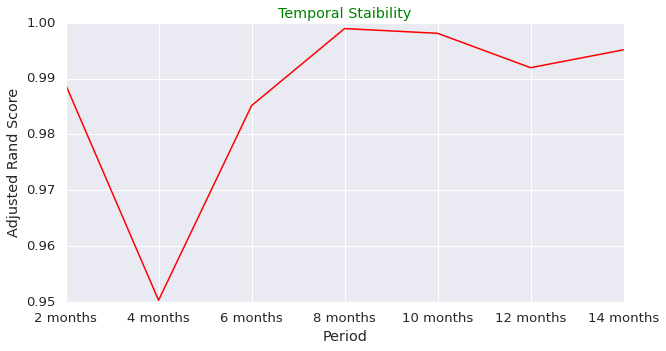

In [139]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))
plt.plot(sil5['Period'], sil5['ARS'], c='red')

plt.xlabel('Period')
plt.ylabel('Adjusted Rand Score')
plt.title('Temporal Staibility', color='green')